In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Phishing/UNB/Multi/Base_classifier_result(URL cross)(2).csv")
data.head()

,labels,rfc_prediction_non,rfc_prediction_phish,rfc_prediction_spam,rfc_prediction_malware,rfc_prediction_defacemen,svc_prediction_non,svc_prediction_phish,svc_prediction_spam,svc_prediction_malware,svc_prediction_defacemen,lr_prediction_non,lr_prediction_phish,lr_prediction_spam,lr_prediction_malware,lr_prediction_defacemen
0,0,0.787365,0.051829,0.048281,0.081046,0.031480,0.949218,0.000855,0.040873,0.005480,0.003575,0.480380,0.005659,0.496001,0.007997,9.962745e-03
1,0,0.987365,0.008738,0.000738,0.002403,0.000756,0.861930,0.070221,0.025044,0.042178,0.000627,0.781592,0.083722,0.063766,0.070917,3.565444e-06
2,0,0.987760,0.008343,0.000738,0.002403,0.000756,0.870795,0.065876,0.023299,0.039465,0.000564,0.771575,0.089509,0.070535,0.068378,2.697831e-06
3,0,0.958656,0.010700,0.012362,0.015703,0.002579,0.984534,0.000460,0.003924,0.007816,0.003266,0.878604,0.007249,0.065317,0.048035,7.957204e-04
4,0,0.688658,0.246476,0.032593,0.032273,0.000000,0.760424,0.086305,0.063192,0.087609,0.002470,0.247769,0.686406,0.001779,0.064045,7.861734e-11


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   labels                    6896 non-null   int64  
 1   rfc_prediction_non        6896 non-null   float64
 2   rfc_prediction_phish      6896 non-null   float64
 3   rfc_prediction_spam       6896 non-null   float64
 4   rfc_prediction_malware    6896 non-null   float64
 5   rfc_prediction_defacemen  6896 non-null   float64
 6   svc_prediction_non        6896 non-null   float64
 7   svc_prediction_phish      6896 non-null   float64
 8   svc_prediction_spam       6896 non-null   float64
 9   svc_prediction_malware    6896 non-null   float64
 10  svc_prediction_defacemen  6896 non-null   float64
 11  lr_prediction_non         6896 non-null   float64
 12  lr_prediction_phish       6896 non-null   float64
 13  lr_prediction_spam        6896 non-null   float64
 14  lr_predi

In [5]:
import numpy as np

y_f = data['labels']
x_f = data.drop('labels',axis=1)

x = np.array(x_f)
y = y_f.values



print(x.shape, y.shape)




(6896, 15) (6896,)


In [6]:
# one hot encoding

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()

encoder.fit(y)
en_y = encoder.transform(y)
dy = np_utils.to_categorical(en_y)



In [7]:
import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def model_aa(x_training, x_val, y_training, y_val, opt, early_stopping_monitor):

  model = Sequential()
  model.add(Dense(10, input_dim=15, activation='relu'))
  model.add(Dense(5, activation='sigmoid'))
  model.compile(optimizer = opt, loss='mse', metrics=["accuracy"])

  # print("check point")
  history = model.fit(x_training, y_training, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping_monitor])


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
  plt.show()

  print('Validation Accuracy: ')
  y_pred = model.predict(x_val)
  Y_pred_classes = np.argmax(y_pred,axis = 1) 
  Y_true = np.argmax(y_val,axis = 1) 


  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(Y_true, Y_pred_classes))

  #target_names = ['True', 'False']
  print(classification_report(Y_true, Y_pred_classes))


  print(confusion_matrix(Y_true, Y_pred_classes))

  # print('Precision: %.4f' % precision_score(y_val, y_pred))
  # print('Recall: %.4f' % recall_score(y_val, y_pred))
  # print('F1 Score: %.4f' % f1_score(y_val, y_pred))
  # tn, fp, fn, tp = confusion_matrix(list(y_val), list(y_pred), labels=[0, 1]).ravel()

  # print('True Positive', tp)
  # print('True Negative', tn)
  # print('False Positive', fp)
  # print('False Negative', fn)


Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.2204 - accuracy: 0.0735 - val_loss: 0.1875 - val_accuracy: 0.2826
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.1618 - accuracy: 0.4969 - val_loss: 0.1366 - val_accuracy: 0.5710
Epoch 3/100
194/194 [==============================] - 0s 2ms/step - loss: 0.1165 - accuracy: 0.7214 - val_loss: 0.0991 - val_accuracy: 0.7710
Epoch 4/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0880 - accuracy: 0.8202 - val_loss: 0.0783 - val_accuracy: 0.8348
Epoch 5/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0710 - accuracy: 0.8439 - val_loss: 0.0642 - val_accuracy: 0.8551
Epoch 6/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0590 - accuracy: 0.8576 - val_loss: 0.0538 - val_accuracy: 0.8667
Epoch 7/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0507 - accuracy: 0.8685 - val_loss: 0.0468 - val_accuracy: 0.8797

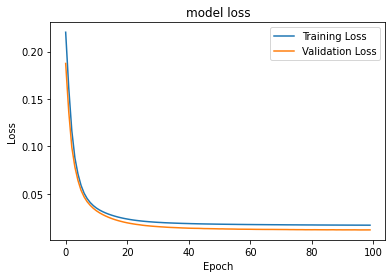

Validation Accuracy: 
Accuracy: 0.9681159420289855
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       229
           1       0.97      0.92      0.95        76
           2       0.95      0.95      0.95       127
           3       0.98      0.98      0.98       159
           4       0.97      0.96      0.96        99

    accuracy                           0.97       690
   macro avg       0.97      0.96      0.96       690
weighted avg       0.97      0.97      0.97       690

[[226   2   1   0   0]
 [  4  70   1   1   0]
 [  1   0 121   2   3]
 [  1   0   2 156   0]
 [  2   0   2   0  95]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1359 - accuracy: 0.6768 - val_loss: 0.0834 - val_accuracy: 0.8087
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0652 - accuracy: 0.8432 - val_loss: 0.0558 - val_accuracy: 0.8594
Epoch 3/100
194/194 [==============================] - 0s 

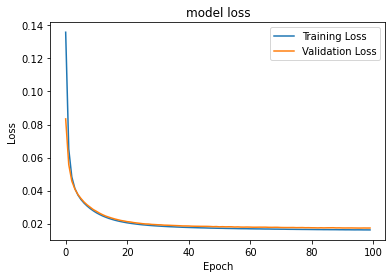

Validation Accuracy: 
Accuracy: 0.9492753623188406
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       241
           1       0.88      0.89      0.88        63
           2       0.91      0.92      0.91       132
           3       0.99      0.96      0.97       168
           4       0.94      0.93      0.94        86

    accuracy                           0.95       690
   macro avg       0.94      0.94      0.94       690
weighted avg       0.95      0.95      0.95       690

[[237   2   1   0   1]
 [  0  56   6   0   1]
 [  2   4 121   2   3]
 [  4   1   2 161   0]
 [  2   1   3   0  80]]
Epoch 1/100
194/194 [==============================] - 1s 4ms/step - loss: 0.1532 - accuracy: 0.5153 - val_loss: 0.1078 - val_accuracy: 0.6536
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0974 - accuracy: 0.6714 - val_loss: 0.0814 - val_accuracy: 0.7130
Epoch 3/100
194/194 [==============================] - 0s 

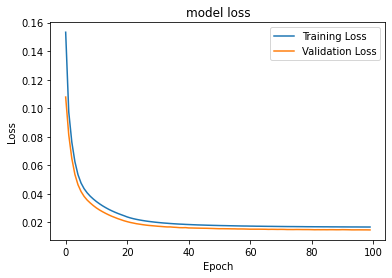

Validation Accuracy: 
Accuracy: 0.9550724637681159
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       236
           1       0.91      0.88      0.90        59
           2       0.90      0.98      0.94       133
           3       0.99      0.95      0.97       163
           4       1.00      0.89      0.94        99

    accuracy                           0.96       690
   macro avg       0.95      0.94      0.94       690
weighted avg       0.96      0.96      0.96       690

[[233   2   1   0   0]
 [  2  52   4   1   0]
 [  1   1 131   0   0]
 [  2   1   5 155   0]
 [  5   1   5   0  88]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1683 - accuracy: 0.5607 - val_loss: 0.1068 - val_accuracy: 0.8290
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0801 - accuracy: 0.8569 - val_loss: 0.0618 - val_accuracy: 0.8681
Epoch 3/100
194/194 [==============================] - 0s 

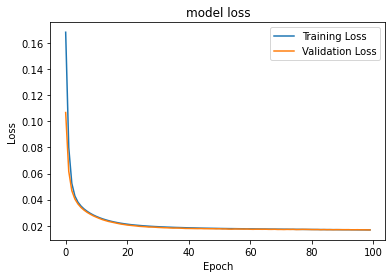

Validation Accuracy: 
Accuracy: 0.946376811594203
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       201
           1       0.95      0.90      0.92        79
           2       0.88      0.97      0.92       123
           3       0.98      0.92      0.95       175
           4       0.97      0.93      0.95       112

    accuracy                           0.95       690
   macro avg       0.95      0.94      0.94       690
weighted avg       0.95      0.95      0.95       690

[[198   1   0   2   0]
 [  2  71   4   2   0]
 [  1   0 119   0   3]
 [  5   3   6 161   0]
 [  1   0   7   0 104]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1208 - accuracy: 0.7357 - val_loss: 0.0749 - val_accuracy: 0.8072
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0586 - accuracy: 0.8487 - val_loss: 0.0513 - val_accuracy: 0.8507
Epoch 3/100
194/194 [==============================] - 0s 2

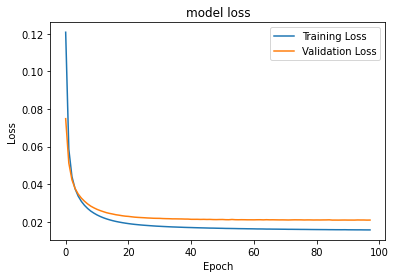

Validation Accuracy: 
Accuracy: 0.9420289855072463
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       227
           1       0.94      0.92      0.93        79
           2       0.89      0.92      0.90       137
           3       0.99      0.93      0.96       153
           4       0.91      0.91      0.91        94

    accuracy                           0.94       690
   macro avg       0.94      0.93      0.93       690
weighted avg       0.94      0.94      0.94       690

[[222   2   3   0   0]
 [  1  73   2   2   1]
 [  2   1 126   0   8]
 [  5   2   3 143   0]
 [  0   0   8   0  86]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1571 - accuracy: 0.5696 - val_loss: 0.1016 - val_accuracy: 0.7710
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0771 - accuracy: 0.8385 - val_loss: 0.0664 - val_accuracy: 0.8217
Epoch 3/100
194/194 [==============================] - 0s 

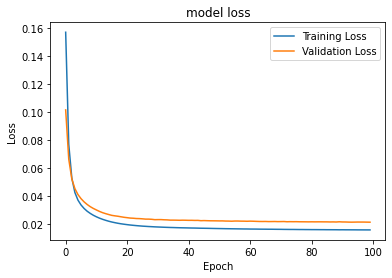

Validation Accuracy: 
Accuracy: 0.9318840579710145
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       206
           1       0.96      0.84      0.90        82
           2       0.86      0.95      0.90       139
           3       0.96      0.92      0.94       161
           4       0.93      0.92      0.93       102

    accuracy                           0.93       690
   macro avg       0.93      0.92      0.93       690
weighted avg       0.93      0.93      0.93       690

[[200   1   2   3   0]
 [  4  69   6   3   0]
 [  2   1 132   0   4]
 [  4   1   5 148   3]
 [  0   0   8   0  94]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1180 - accuracy: 0.7741 - val_loss: 0.0670 - val_accuracy: 0.8636
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0585 - accuracy: 0.8565 - val_loss: 0.0469 - val_accuracy: 0.8766
Epoch 3/100
194/194 [==============================] - 0s 

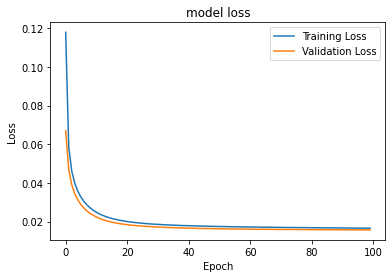

Validation Accuracy: 
Accuracy: 0.9506531204644412
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       229
           1       0.93      0.89      0.91        71
           2       0.92      0.96      0.94       126
           3       0.98      0.96      0.97       158
           4       0.96      0.92      0.94       105

    accuracy                           0.95       689
   macro avg       0.95      0.94      0.94       689
weighted avg       0.95      0.95      0.95       689

[[223   2   2   2   0]
 [  3  63   3   1   1]
 [  1   1 121   0   3]
 [  4   2   1 151   0]
 [  3   0   5   0  97]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1161 - accuracy: 0.6594 - val_loss: 0.0773 - val_accuracy: 0.7678
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0625 - accuracy: 0.8569 - val_loss: 0.0547 - val_accuracy: 0.8607
Epoch 3/100
194/194 [==============================] - 0s 

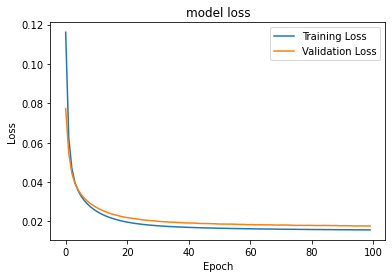

Validation Accuracy: 
Accuracy: 0.9361393323657474
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       232
           1       0.86      0.88      0.87        67
           2       0.89      0.93      0.91       126
           3       0.95      0.96      0.96       147
           4       0.93      0.92      0.93       117

    accuracy                           0.94       689
   macro avg       0.92      0.93      0.92       689
weighted avg       0.94      0.94      0.94       689

[[220   7   1   3   1]
 [  1  59   3   3   1]
 [  1   1 117   1   6]
 [  1   2   3 141   0]
 [  1   0   8   0 108]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1319 - accuracy: 0.6456 - val_loss: 0.0848 - val_accuracy: 0.8723
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0682 - accuracy: 0.8693 - val_loss: 0.0534 - val_accuracy: 0.8940
Epoch 3/100
194/194 [==============================] - 0s 

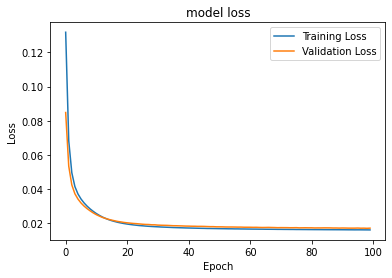

Validation Accuracy: 
Accuracy: 0.9462989840348331
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       232
           1       0.96      0.89      0.92        61
           2       0.88      0.96      0.92       137
           3       0.96      0.91      0.93       145
           4       0.96      0.96      0.96       114

    accuracy                           0.95       689
   macro avg       0.95      0.94      0.94       689
weighted avg       0.95      0.95      0.95       689

[[225   0   3   4   0]
 [  1  54   5   1   0]
 [  1   0 131   1   4]
 [  5   2   6 132   0]
 [  0   0   4   0 110]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1542 - accuracy: 0.6087 - val_loss: 0.0879 - val_accuracy: 0.8578
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0712 - accuracy: 0.8676 - val_loss: 0.0558 - val_accuracy: 0.9013
Epoch 3/100
194/194 [==============================] - 0s 

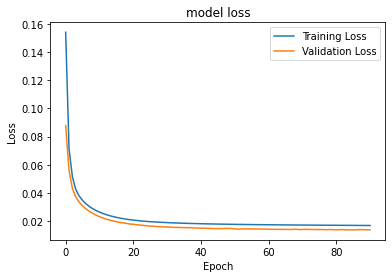

Validation Accuracy: 
Accuracy: 0.9521044992743106
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       225
           1       0.90      0.88      0.89        60
           2       0.95      0.95      0.95       139
           3       0.96      0.96      0.96       164
           4       0.90      0.98      0.94       101

    accuracy                           0.95       689
   macro avg       0.94      0.95      0.94       689
weighted avg       0.95      0.95      0.95       689

[[215   2   2   4   2]
 [  0  53   2   2   3]
 [  0   2 132   0   5]
 [  3   2   1 157   1]
 [  0   0   2   0  99]]


In [8]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)


from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)


kf = KFold(n_splits=10, random_state=10, shuffle=True)
for train, val in kf.split(x, dy):
  model_aa(x[train], x[val], dy[train], dy[val], optimizer1, early_stopping_monitor)